Demonstrating the efficacy of Bartlett's Method and Welch's Method

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from numpy.fft import fft

# Periodogram

In [36]:
nSamples = 2**16
x = random.randn(nSamples)

# DTFT
X = fft(x)
X_periodogram = ((np.abs(X))**2)/nSamples

w = 2*np.pi / nSamples * np.arange(nSamples)

In [33]:
bin_size = 256
bins = int(nSamples/bin_size)-1

X_B = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
m = 0
for k in range(bins):
    s = x[m:m+bin_size]
    Xs = fft(s)
    Xs_periodogram = (np.abs(Xs)**2) / bin_size
    X_B += Xs_periodogram
    
    m += bin_size

X_B /= bins

In [34]:
bin_size = 256
m_inc = int(bin_size*0.8)
bins = int(nSamples / m_inc)-1

X_W = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
m = 0
for k in range(bins):
    s = x[m:m+bin_size]
    Xs = fft(s)
    Xs_periodogram = (np.abs(Xs)**2) / bin_size
    X_W += Xs_periodogram
    
    m += m_inc # allow segment overlap!

X_W /= bins

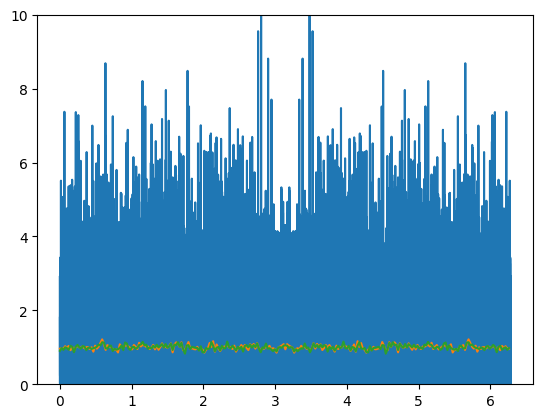

In [35]:
# Periodogram
w = 2*np.pi * np.arange(len(X_periodogram))/len(X_periodogram)
plt.plot(w,X_periodogram,label="Periodogram")

# Bartlett's
w = 2*np.pi * np.arange(len(X_B))/len(X_B)
plt.plot(w,X_B,label="Bartlett's")

# Welch's
w = 2*np.pi * np.arange(len(X_W))/len(X_W)
plt.plot(w,X_W,label="Welch's")

plt.ylim(0,10)
plt.show()